# Flower Recognition CNN Keras

## CONTENTS ::
[ **1 ) Importing Various Modules**](#content1)

[ **2 ) Preparing the Data**](#content2)

[ **3 ) Modelling**](#content3)

[ **4 ) Evaluating the Model Performance**](#content4)

[ **5 ) Visualizing Predictons on the Validation Set**](#content5)

<a id="content1"></a>
## 1 ) Importing Various Modules.

In [1]:

import PIL
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.src.legacy.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


<a id="content2"></a>
## 2 ) Preparing the Data

## 2.1) Making the functions to get the training and validation set from the Images

In [2]:
#Fetch Images count from Fodlers

In [3]:
count = 0 
dirs = os.listdir('C:/Users/hp/OneDrive/Desktop/main flower/main/flower_photos/')
for dir in dirs:
    files = list(os.listdir('C:/Users/hp/OneDrive/Desktop/main flower/main/flower_photos/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

daisy Folder has 632 Images
dandelion Folder has 898 Images
roses Folder has 640 Images
sunflowers Folder has 900 Images
tulips Folder has 798 Images
Images Folder has 3868 Images


In [4]:
import pathlib
dataset = "C:/Users/hp/OneDrive/Desktop/main flower/main/flower_photos"
data_dir = pathlib.Path(dataset)

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print("TOTAL NUMBER OF .jpg TYPE PHOTOS: ",image_count)

TOTAL NUMBER OF .jpg TYPE PHOTOS:  3868


In [6]:
image_count = len(list(data_dir.glob('*/*.png')))
print("TOTAL NUMBER OF .png TYPE PHOTOS: ",image_count)

TOTAL NUMBER OF .png TYPE PHOTOS:  0


In [7]:
print(os.listdir(data_dir))

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


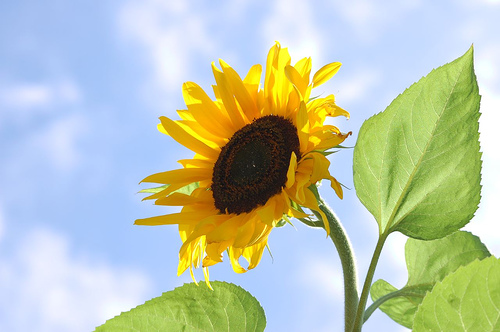

In [8]:
sunflowers = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[24]))

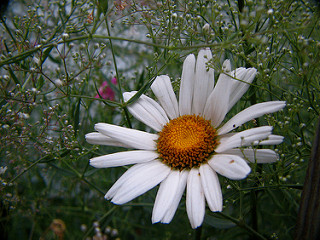

In [9]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[240]))

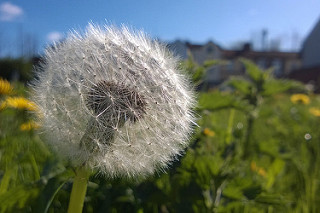

In [10]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[212]))

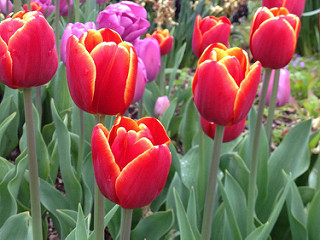

In [11]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[726]))

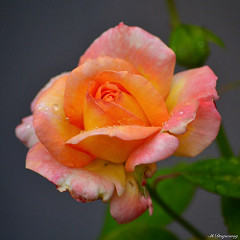

In [12]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[210]))

In [13]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='C:/Users/hp/OneDrive/Desktop/main flower/main/flower_photos/daisy'
FLOWER_SUNFLOWER_DIR='C:/Users/hp/OneDrive/Desktop/main flower/main/flower_photos/sunflowers/'
FLOWER_TULIP_DIR='C:/Users/hp/OneDrive/Desktop/main flower/main/flower_photos/tulips/'
FLOWER_DANDI_DIR='C:/Users/hp/OneDrive/Desktop/main flower/main/flower_photos/dandelion/'
FLOWER_ROSE_DIR='C:/Users/hp/OneDrive/Desktop/main flower/main/flower_photos/roses/'

In [14]:
def assign_label(img,flower_type):
    return flower_type

In [15]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [16]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 632/632 [00:06<00:00, 94.98it/s] 


632


100%|██████████| 900/900 [00:10<00:00, 85.23it/s] 


1532


100%|██████████| 798/798 [00:08<00:00, 93.20it/s] 


2330


100%|██████████| 898/898 [00:09<00:00, 95.77it/s] 


3228


100%|██████████| 640/640 [00:06<00:00, 91.48it/s] 

3868


## 2.2 ) Visualizing some Random Images

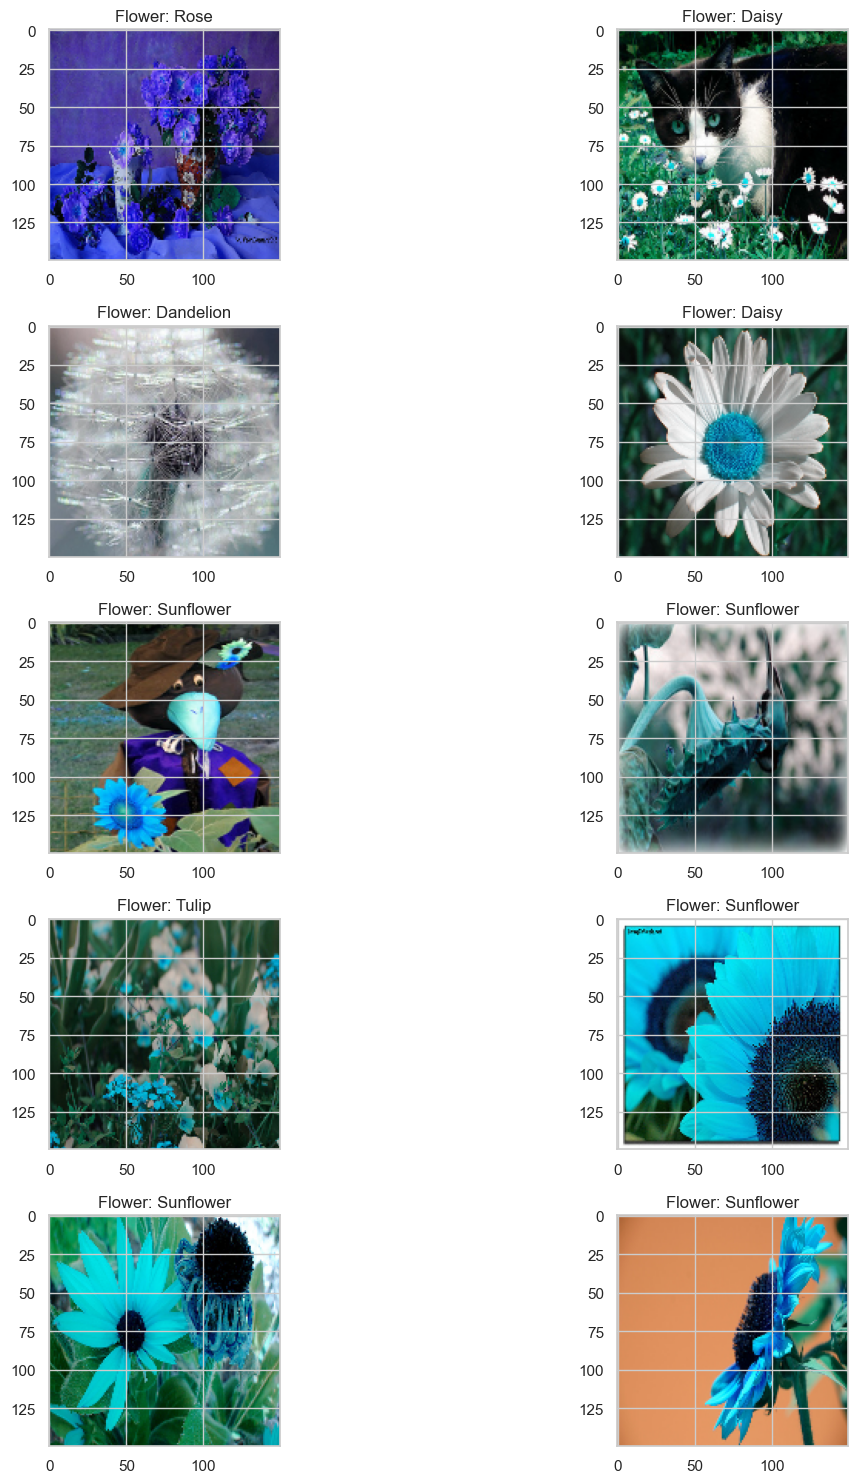

In [17]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()
        

## 2.3 ) Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding

In [18]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

## 2.4 ) Splitting into Training and Validation Sets

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

##  2.5 ) Setting the Random Seeds



In [20]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)


<a id="content3"></a>
## 3 ) Modelling

## 3.1 ) Building the ConvNet Model

In [21]:
#Load Images into Arrays as Dataset

In [22]:
# # modelling  using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

## 3.2 ) Using a LR Annealer

In [23]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

## 3.3 ) Data Augmentation to prevent Overfitting

In [24]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

## 3.4 ) Compiling the Keras Model & Summary

In [25]:
from keras.optimizers import Adam

# Assuming 'model' is already defined

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7776)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,981,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,143,749 (15.81 MB)

 Trainable params: 4,143,749 (15.81 MB)

 Non-trainable params: 0 (0.00 B)

## 3.5 ) Fitting on the Training set and making predcitons on the Validation set

In [27]:
###History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              ##epochs = epochs, validation_data = (x_test,y_test),
                              #verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

History=model.fit(x_train,y_train,epochs=50,batch_size=batch_size,validation_data = (x_test,y_test))




Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.2863 - loss: 1.5718 - val_accuracy: 0.4695 - val_loss: 1.1727
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5153 - loss: 1.1463 - val_accuracy: 0.5595 - val_loss: 1.0525
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.5888 - loss: 1.0127 - val_accuracy: 0.6256 - val_loss: 0.9550
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.6350 - loss: 0.9195 - val_accuracy: 0.6381 - val_loss: 0.9098
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6732 - loss: 0.8413 - val_accuracy: 0.6453 - val_loss: 0.9048
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7096 - loss: 0.7701 - val_accuracy: 0.6660 - val_loss: 0.8552
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.7342 - loss: 0.7166 - val_accuracy: 0.6732 - val_loss: 0.8504
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7711 - loss: 0.6360 - val_accuracy: 0.6805 - val_loss:

<a id="content4"></a>
## 4 ) Evaluating the Model Performance

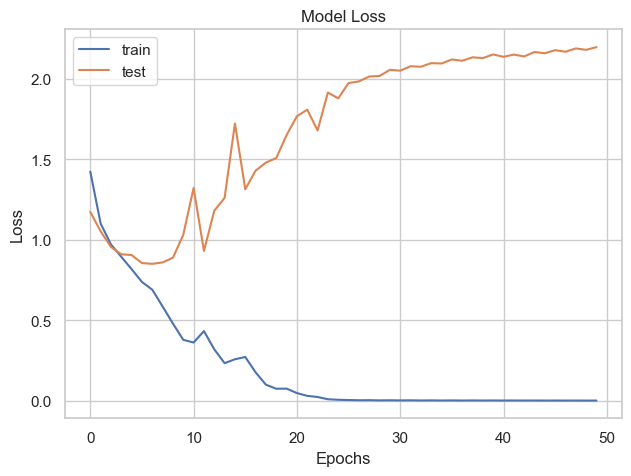

In [28]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [29]:
##jvsnxjkmvn

<a id="content5"></a>
## 5 ) Visualizing Predictons on the Validation Set

In [30]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step


In [31]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

#### CORRECTLY CLASSIFIED FLOWER IMAGES

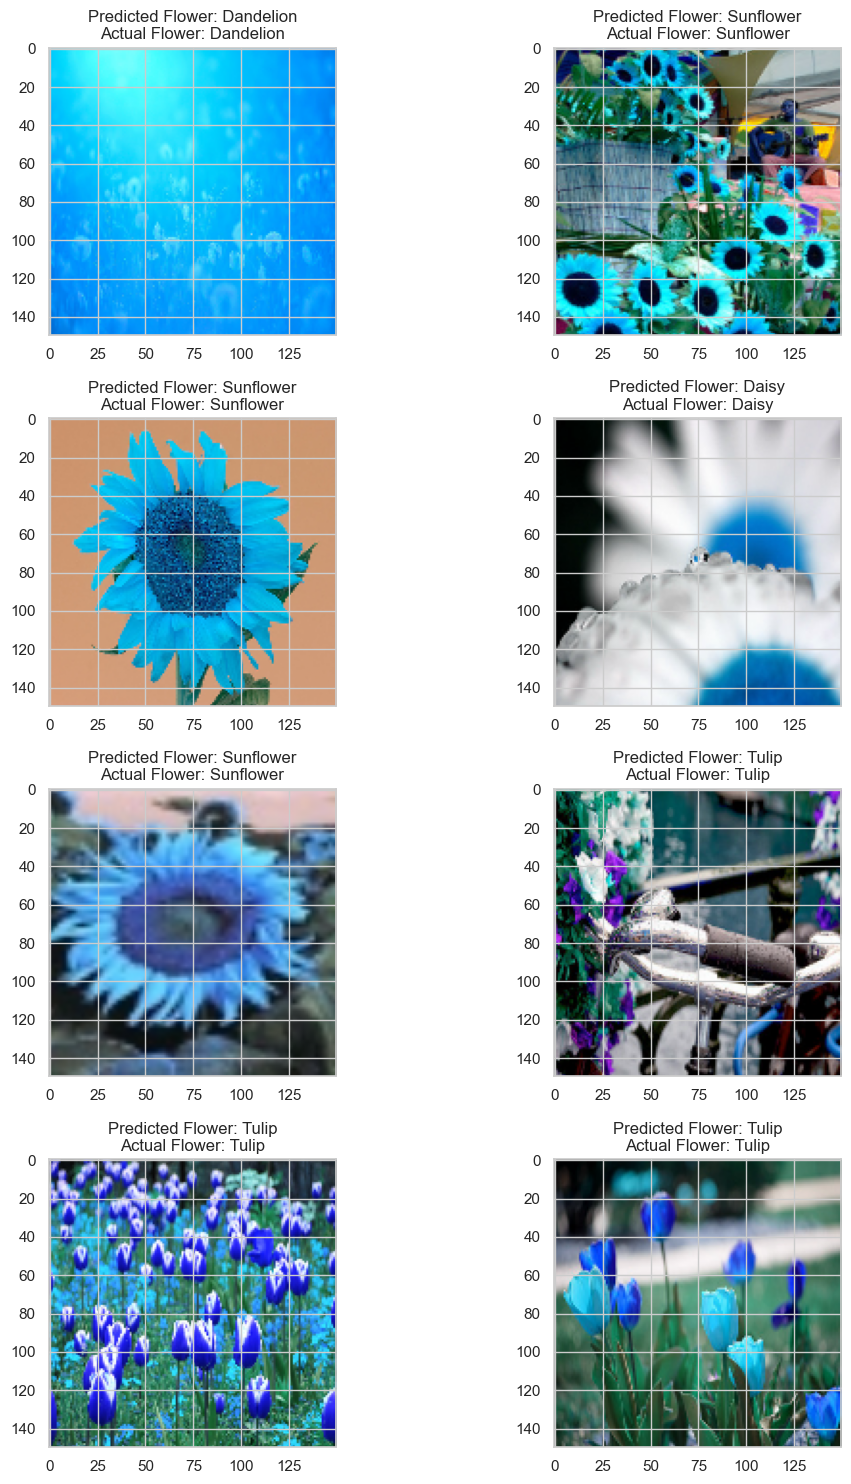

In [32]:
import numpy as np


count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)
for i in range(4):
    for j in range(2):
        ax[i, j].imshow(x_test[prop_class[count]])
        # Convert y_test to 1D array before passing it to inverse_transform
        actual_label = le.inverse_transform([np.argmax(y_test[prop_class[count]])])[0]
        pred_label = le.inverse_transform([pred_digits[prop_class[count]]])[0]
        ax[i, j].set_title("Predicted Flower: " + str(pred_label) + "\n" + "Actual Flower: " + str(actual_label))
        plt.tight_layout()
        count += 1


#### MISCLASSIFIED IMAGES OF FLOWERS

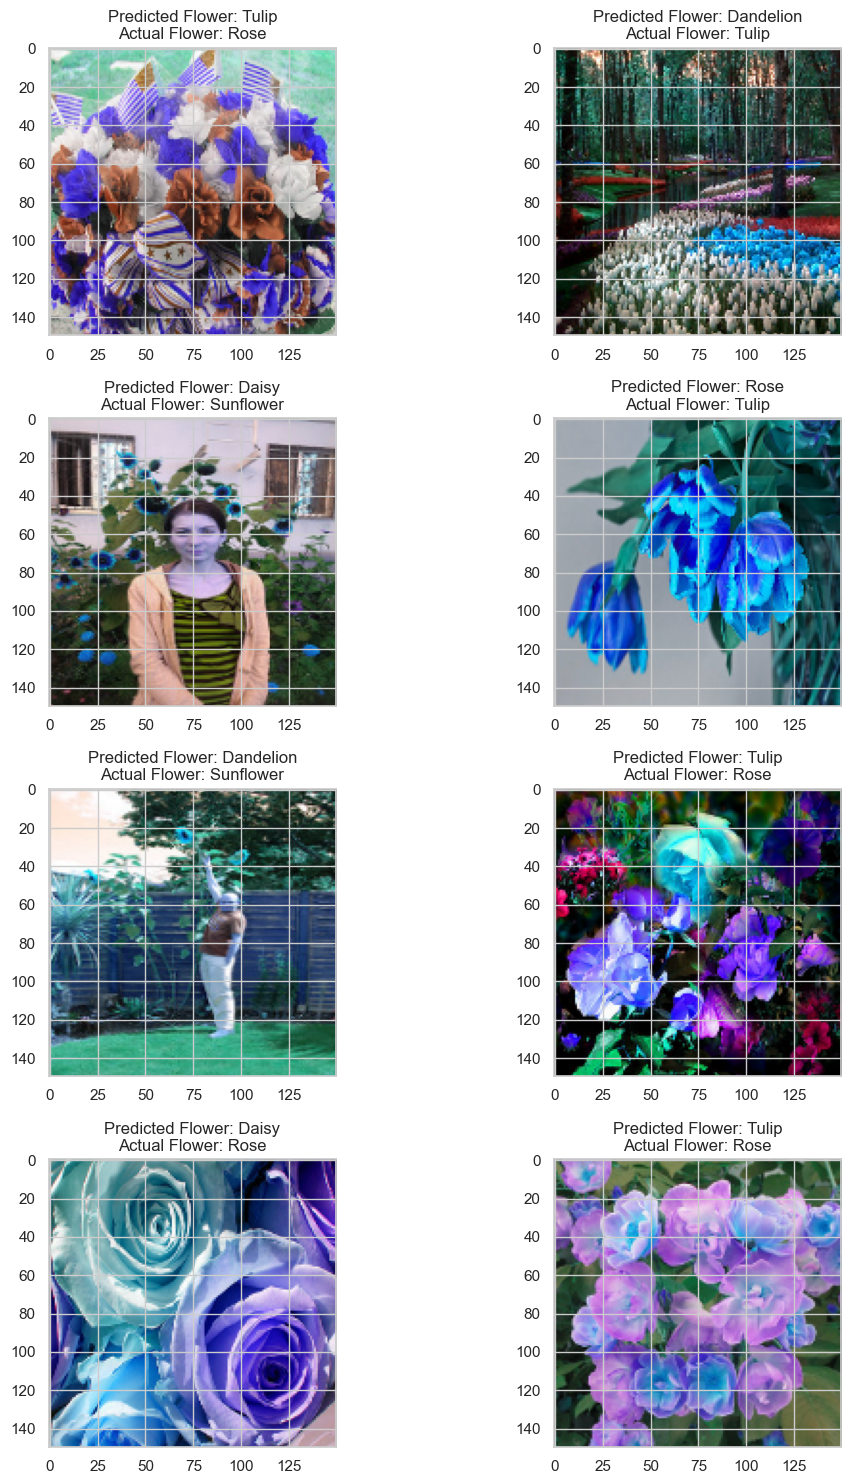

In [33]:
import numpy as np

# Your existing code

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)
for i in range(4):
    for j in range(2):
        ax[i, j].imshow(x_test[mis_class[count]])
        # Convert y_test to 1D array before passing it to inverse_transform
        actual_label = le.inverse_transform([np.argmax(y_test[mis_class[count]])])[0]
        pred_label = le.inverse_transform([pred_digits[mis_class[count]]])[0]
        ax[i, j].set_title("Predicted Flower: " + str(pred_label) + "\n" + "Actual Flower: " + str(actual_label))
        plt.tight_layout()
        count += 1


In [34]:
model.save('Flower_Recog_Model(123).h5')